T-Test Results (Setosa vs Versicolor - Petal Length):
T-Statistic: -39.4927, P-Value: 0.0000
Reject the null hypothesis: The means are significantly different.

Z-Test Result (Setosa - Sepal Length):
Z-Score: 0.1204
Fail to reject the null hypothesis: The mean is not significantly different from 5.0.

ANOVA Results (Petal Width - Across Species):
F-Statistic: 960.0071, P-Value: 0.0000
Reject the null hypothesis: At least one mean is significantly different.

Correlation and Regression (Sepal Length vs Petal Length):
Pearson Correlation Coefficient: 0.8718, P-Value: 0.0000
The correlation is significant.
Linear Regression Equation: y = 1.8584x + -7.1014
R-Squared: 0.7600


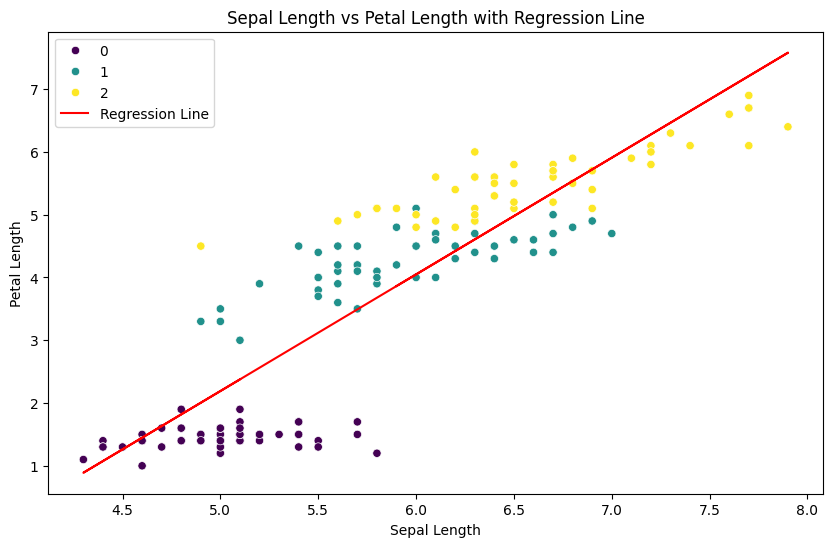

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import ttest_ind, zscore, f_oneway, pearsonr, linregress

# Step 1: Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Add species column (0: Setosa, 1: Versicolor, 2: Virginica)

# Rename columns for simplicity
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Separate species
setosa = df[df['species'] == 0]
versicolor = df[df['species'] == 1]
virginica = df[df['species'] == 2]

# Step 2: T-Test
# Null Hypothesis: The mean petal lengths of Setosa and Versicolor are equal
t_stat, p_value_t = ttest_ind(setosa['petal_length'], versicolor['petal_length'])
print("T-Test Results (Setosa vs Versicolor - Petal Length):")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value_t:.4f}")
if p_value_t < 0.05:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")

# Step 3: Z-Test
# Null Hypothesis: The mean sepal length of Setosa equals 5.0
mean_setosa = setosa['sepal_length'].mean()
std_setosa = setosa['sepal_length'].std()
n_setosa = len(setosa['sepal_length'])
z_score = (mean_setosa - 5.0) / (std_setosa / np.sqrt(n_setosa))

print("\nZ-Test Result (Setosa - Sepal Length):")
print(f"Z-Score: {z_score:.4f}")
if abs(z_score) > 1.96:  # Critical value for 95% confidence
    print("Reject the null hypothesis: The mean is significantly different from 5.0.")
else:
    print("Fail to reject the null hypothesis: The mean is not significantly different from 5.0.")

# Step 4: ANOVA
# Null Hypothesis: The mean petal widths across all three species are equal
f_stat, p_value_anova = f_oneway(setosa['petal_width'], versicolor['petal_width'], virginica['petal_width'])
print("\nANOVA Results (Petal Width - Across Species):")
print(f"F-Statistic: {f_stat:.4f}, P-Value: {p_value_anova:.4f}")
if p_value_anova < 0.05:
    print("Reject the null hypothesis: At least one mean is significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")

# Step 5: Correlation and Regression
# Relationship between sepal length and petal length
corr, p_value_corr = pearsonr(df['sepal_length'], df['petal_length'])
slope, intercept, r_value, p_value_reg, std_err = linregress(df['sepal_length'], df['petal_length'])

print("\nCorrelation and Regression (Sepal Length vs Petal Length):")
print(f"Pearson Correlation Coefficient: {corr:.4f}, P-Value: {p_value_corr:.4f}")
if p_value_corr < 0.05:
    print("The correlation is significant.")
else:
    print("The correlation is not significant.")

print(f"Linear Regression Equation: y = {slope:.4f}x + {intercept:.4f}")
print(f"R-Squared: {r_value**2:.4f}")

# Plot the Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['sepal_length'], y=df['petal_length'], hue=df['species'], palette='viridis')
plt.plot(df['sepal_length'], slope * df['sepal_length'] + intercept, color='red', label='Regression Line')
plt.title("Sepal Length vs Petal Length with Regression Line")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.show()